In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8db04888be55e4c223ad96bfe0fe77503dd64e4df56deed64cf71e1265b50f69
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


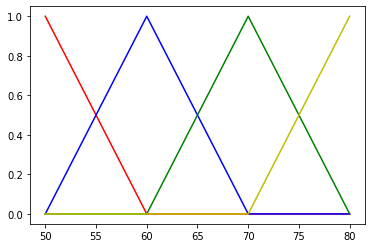

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1) # tao truc x tu 50-> 80 khoang chia 1 don vi
slow=fuzz.trimf(x,[50,50,60]) # tao mang ung voi hinh tam giac
medium=fuzz.trimf(x,[50,60,70])
medium_fast=fuzz.trimf(x,[60,70,80])
full_speed=fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

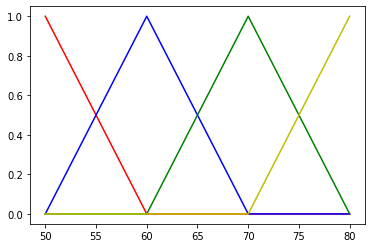

In [3]:
x=np.arange(50,81,1) 
slow=fuzz.trapmf(x,[50,50,50,60]) 
medium=fuzz.trapmf(x,[50,60,60,70])
medium_fast=fuzz.trapmf(x,[60,70,70,80])
full_speed=fuzz.trapmf(x,[70,80,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

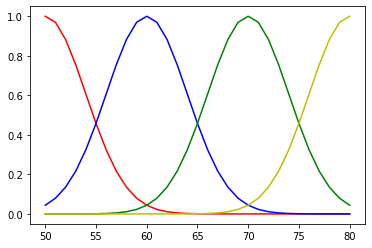

In [4]:
x=np.arange(50,81,1) 
slow=fuzz.gaussmf(x,50,4) 
medium=fuzz.gaussmf(x,60,4)
medium_fast=fuzz.gaussmf(x,70,4)
full_speed=fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,15])
tip['mid']=fuzz.trimf(tip.universe,[10,15,20])
tip['much']=fuzz.trimf(tip.universe,[15,30,30])

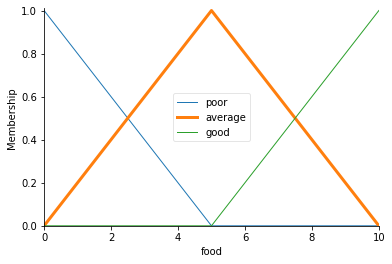

In [7]:
food['average'].view()

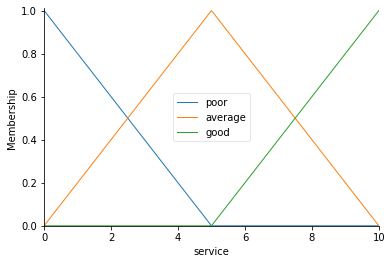

In [8]:
service.view()

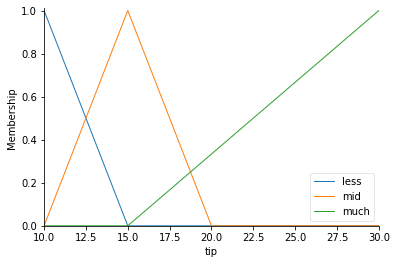

In [9]:
tip.view()

18.987674169346203


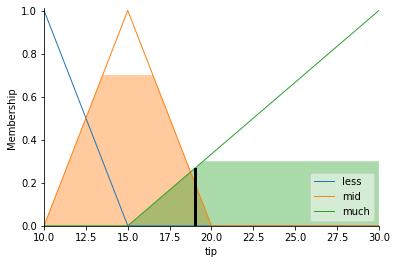

In [10]:
rule_1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule_2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule_3=ctrl.Rule(food['poor']&service['good'],tip['mid'])
rule_4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule_5=ctrl.Rule(food['average']&service['average'],tip['mid'])
rule_6=ctrl.Rule(food['average']&service['good'],tip['much'])
rule_7=ctrl.Rule(food['good']&service['poor'],tip['less'])
rule_8=ctrl.Rule(food['good']&service['average'],tip['much'])
rule_9=ctrl.Rule(food['good']&service['good'],tip['much'])
#------------------------------------------------------------
tipping_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=5.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rice=ctrl.Antecedent(np.arange(100,1501,1),'rice')
time=ctrl.Antecedent(np.arange(10,181,1),'time')
power=ctrl.Consequent(np.arange(10,101,1),'power')

In [12]:
rice['v_lit']=fuzz.trimf(rice.universe,[100,100,400])
rice['lit']=fuzz.trimf(rice.universe,[100,300,600])
rice['medium']=fuzz.trimf(rice.universe,[300,600,900])
rice['much']=fuzz.trimf(rice.universe,[600,900,1200])
rice['v_much']=fuzz.trimf(rice.universe,[1000,1500,1500])

In [13]:
time['v_fast']=fuzz.trimf(time.universe,[10,10,20])
time['fast']=fuzz.trimf(time.universe,[10,20,30])
time['medium']=fuzz.trimf(time.universe,[25,40,50])
time['slow']=fuzz.trimf(time.universe,[40,90,160])
time['v_slow']=fuzz.trapmf(time.universe,[90,120,180,180])

In [14]:
power['v_low']=fuzz.trimf(power.universe,[10,10,25])
power['low']=fuzz.trimf(power.universe,[10,20,50])
power['medium']=fuzz.trimf(power.universe,[40,50,60])
power['high']=fuzz.trimf(power.universe,[55,80,100])
power['v_high']=fuzz.trimf(power.universe,[80,100,100])

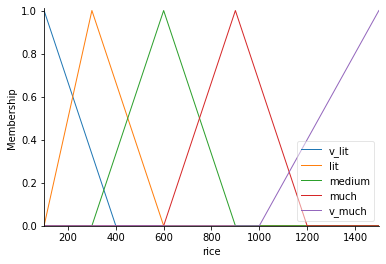

In [15]:
rice.view()

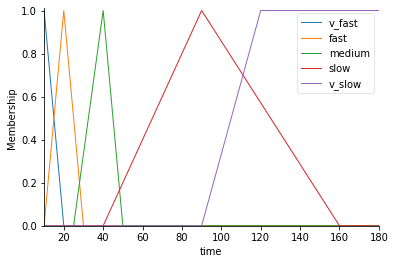

In [16]:
time.view()

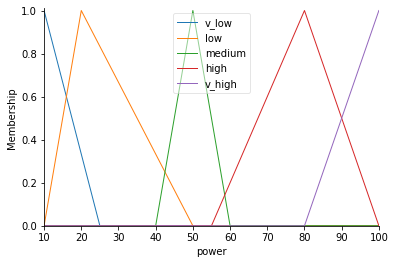

In [17]:
power.view()